<a href="https://colab.research.google.com/github/bsshewale/Voyage-Analytics-Integrating-MLOps-in-Travel-Industry/blob/main/Voyage_Analytics_Integrating_MLOps_in_Travel_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

# Voyage Analytics: Integrating MLOps in Travel Industry





##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Bharat Shewale


# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Enhancing predictive capabilities in travel-related decision-making**

* Forecast travel demand, booking cancellations, and pricing trends.

* Personalize recommendations for users to improve travel experiences.





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load Dataset
flights=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Voyage Analytics: Integrating MLOps in Travel Industry/Dataset/flights.csv')
hotels=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Voyage Analytics: Integrating MLOps in Travel Industry/Dataset/hotels.csv')
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Voyage Analytics: Integrating MLOps in Travel Industry/Dataset/users.csv')

### Dataset First View

In [8]:
# Dataset First Look
print(flights.head())

   travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56      CloudFy  10/03/2019  
3  1127.36  1.66    637.56      CloudFy  10/04/2019  
4  1684.05  2.16    830.86      CloudFy  10/10/2019  


In [9]:
print(hotels.head())

   travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   

         date  
0  09/26/2019  
1  10/10/2019  
2  11/14/2019  
3  12/12/2019  
4  12/26/2019  


In [10]:
print(users.head())

   code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44


In [11]:
# Merge on travelCode and userCode
flight_hotel = pd.merge(
    flights,
    hotels,
    on=["travelCode", "userCode"],
    how="left",   # only trips with both flights & hotels
    suffixes=("_flight", "_hotel")
)
flight_hotel.head(10)

,travelCode,userCode,from,to,flightType,price_flight,time,distance,agency,date_flight,name,place,days,price_hotel,total,date_hotel
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019
5,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,10/17/2019,NaN,NaN,NaN,NaN,NaN,NaN
7,3,0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,10/20/2019,NaN,NaN,NaN,NaN,NaN,NaN
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,10/24/2019,NaN,NaN,NaN,NaN,NaN,NaN
9,4,0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,10/26/2019,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
flight_hotel.shape

(271888, 16)

In [13]:
# Merge with Users on userCode (flights/hotels) and code (users)
trip_data = pd.merge(
    flight_hotel,
    users,
    left_on="userCode",
    right_on="code",
    how="inner"
)

# Drop duplicate columns if needed
trip_data.drop(columns=["code"], inplace=True)

In [14]:
trip_data.shape

(271888, 20)

In [15]:
trip_data.head(10)

,travelCode,userCode,from,to,flightType,price_flight,time,distance,agency,date_flight,name_x,place,days,price_hotel,total,date_hotel,company,name_y,gender,age
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,NaN,NaN,NaN,NaN,NaN,NaN,4You,Roy Braun,male,21
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,NaN,NaN,NaN,NaN,NaN,NaN,4You,Roy Braun,male,21
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019,4You,Roy Braun,male,21
5,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019,4You,Roy Braun,male,21
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,10/17/2019,NaN,NaN,NaN,NaN,NaN,NaN,4You,Roy Braun,male,21
7,3,0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,10/20/2019,NaN,NaN,NaN,NaN,NaN,NaN,4You,Roy Braun,male,21
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,10/24/2019,NaN,NaN,NaN,NaN,NaN,NaN,4You,Roy Braun,male,21
9,4,0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,10/26/2019,NaN,NaN,NaN,NaN,NaN,NaN,4You,Roy Braun,male,21


In [16]:
trip_data.rename(columns={'name_x':'name_hotel', 'name_y':'name_user', 'total':'hotel_total_price', 'place':'hotel_place', 'time':'flight_time'}, inplace=True)

### Dataset Rows & Columns count

In [17]:
# Dataset Rows & Columns count
flights.shape

(271888, 10)

In [18]:
hotels.shape

(40552, 8)

In [19]:
users.shape

(1340, 5)

### Dataset Information

In [20]:
# Dataset Info
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   travelCode         271888 non-null  int64  
 1   userCode           271888 non-null  int64  
 2   from               271888 non-null  object 
 3   to                 271888 non-null  object 
 4   flightType         271888 non-null  object 
 5   price_flight       271888 non-null  float64
 6   flight_time        271888 non-null  float64
 7   distance           271888 non-null  float64
 8   agency             271888 non-null  object 
 9   date_flight        271888 non-null  object 
 10  name_hotel         81104 non-null   object 
 11  hotel_place        81104 non-null   object 
 12  days               81104 non-null   float64
 13  price_hotel        81104 non-null   float64
 14  hotel_total_price  81104 non-null   float64
 15  date_hotel         81104 non-null   object 
 16  co

#### Duplicate Values

In [21]:
# Dataset Duplicate Value Count
dup_count = trip_data.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


#### Missing Values/Null Values

In [22]:
# Missing Values/Null Values Count
na_counts = trip_data.isna().sum()
print(na_counts)

travelCode                0
userCode                  0
from                      0
to                        0
flightType                0
price_flight              0
flight_time               0
distance                  0
agency                    0
date_flight               0
name_hotel           190784
hotel_place          190784
days                 190784
price_hotel          190784
hotel_total_price    190784
date_hotel           190784
company                   0
name_user                 0
gender                    0
age                       0
dtype: int64


<Axes: xlabel='Columns', ylabel='Counts'>

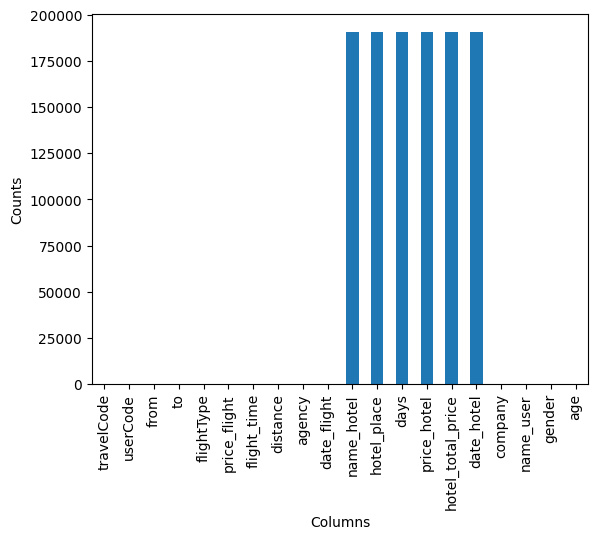

In [23]:
# Visualizing the missing values
na_counts.plot(kind='bar', xlabel='Columns', ylabel='Counts')

### What did you know about your dataset?

* The flights data is fully complete — every trip has a departure city, destination, price, time, and agency details.

* The user data is also complete — I have each user’s company, name, gender, and age. This will help me in personalization tasks.

* The hotel data, however, is missing for about 70% of the rows. This means that a large number of users book only flights, while only around 30% book both flights and hotels.



## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
trip_data.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price_flight',
       'flight_time', 'distance', 'agency', 'date_flight', 'name_hotel',
       'hotel_place', 'days', 'price_hotel', 'hotel_total_price', 'date_hotel',
       'company', 'name_user', 'gender', 'age'],
      dtype='object')

In [25]:
# Dataset Describe
trip_data.describe()

,travelCode,userCode,price_flight,flight_time,distance,days,price_hotel,hotel_total_price,age
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000,81104.000000,81104.000000,81104.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535,2.499679,214.439554,536.229513,42.815005
std,39243.724665,389.523127,362.31189,0.542541,208.851288,1.119319,76.741832,319.329514,12.946294
min,0.000000,0.000000,301.51000,0.440000,168.220000,1.000000,60.390000,60.390000,21.000000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000,1.000000,165.990000,247.620000,32.000000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000,2.000000,242.880000,495.240000,42.000000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000,4.000000,263.410000,742.860000,54.000000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000,4.000000,313.020000,1252.080000,65.000000


### Variables Description

| Variable          | Description                                                           |
| ----------------- | --------------------------------------------------------------------- |
| **travelCode**    | Unique identifier for each travel booking (links flights and hotels). |
| **userCode**      | Unique identifier for each user (foreign key to users dataset).       |
| **from**          | Departure city/airport of the flight.                                 |
| **to**            | Destination city/airport of the flight.                               |
| **flightType**    | Type of flight ticket (e.g., *economic*, *firstClass*).               |
| **price\_flight** | Cost of the flight booking (in currency).                             |
| **flight\_time**  | Duration of the flight (in hours).                                    |
| **distance**      | Distance of the flight (in kilometers).                               |
| **agency**        | Travel agency handling the flight booking.                            |
| **date\_flight**  | Date of the flight booking.                                           |
| **name\_hotel**   | Name of the hotel booked (if applicable).                             |
| **hotel\_place**  | Location (city) of the hotel booked.                                  |
| **days**          | Number of nights stayed at the hotel.                                 |
| **price\_hotel**  | Price per night of the hotel stay.                                    |
| **hotel\_total\_price**  | Total hotel booking cost (`days × price_hotel`).                      |
| **date\_hotel**   | Date of the hotel booking.                                            |
| **company**       | Company associated with the user (from users dataset).                |
| **name\_user**    | Full name of the user.                                                |
| **gender**        | Gender of the user (male, female, none).                              |
| **age**           | Age of the user.                                                      |


### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable.
trip_data.nunique()

,0
travelCode,135944
userCode,1335
from,9
to,9
flightType,3
price_flight,490
flight_time,33
distance,35
agency,3
date_flight,999


## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# Write your code to make your dataset analysis ready.
# Missing value imputation
trip_data["name_hotel"] = trip_data["name_hotel"].fillna("No Hotel")
trip_data["hotel_place"] = trip_data["hotel_place"].fillna("NA")
trip_data["days"] = trip_data["days"].fillna(0)
trip_data["price_hotel"] = trip_data["price_hotel"].fillna(0)
trip_data["hotel_total_price"] = trip_data["hotel_total_price"].fillna(0)
trip_data["date_hotel"] = trip_data["date_hotel"].fillna("NA")



In [28]:
trip_data.head()

,travelCode,userCode,from,to,flightType,price_flight,flight_time,distance,agency,date_flight,name_hotel,hotel_place,days,price_hotel,hotel_total_price,date_hotel,company,name_user,gender,age
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,No Hotel,NA,0.0,0.00,0.00,NA,4You,Roy Braun,male,21
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,No Hotel,NA,0.0,0.00,0.00,NA,4You,Roy Braun,male,21
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019,4You,Roy Braun,male,21


In [29]:
# Whether use has hotel
trip_data["has_hotel"] = trip_data["name_hotel"].apply(lambda x: 0 if x=="No Hotel" else 1)

In [30]:
# Feature engineering
trip_data["trip_cost"] = trip_data["price_flight"] + trip_data["hotel_total_price"]
trip_data["trip_duration"] = trip_data["flight_time"] + trip_data["days"]

### What all manipulations have you done and insights you found?

1. Flight-centric bookings: Every trip has flight info. Users book flights more consistently
than hotels.

2. Hotel bookings are optional: Only ~30% of trips include hotels.

3. Users data is complete: Can be used for personalization (gender, age, company).

4. Segment opportunities:
* Flight-only vs flight+hotel users
* Predict hotel booking likelihood
* Analyze cost patterns by age, gender, and trip distance

5. Real-world reflection: Missing hotel data reflects realistic travel behavior — not everyone books a package trip.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-1358650810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="has_hotel", data=trip_data, palette="pastel")


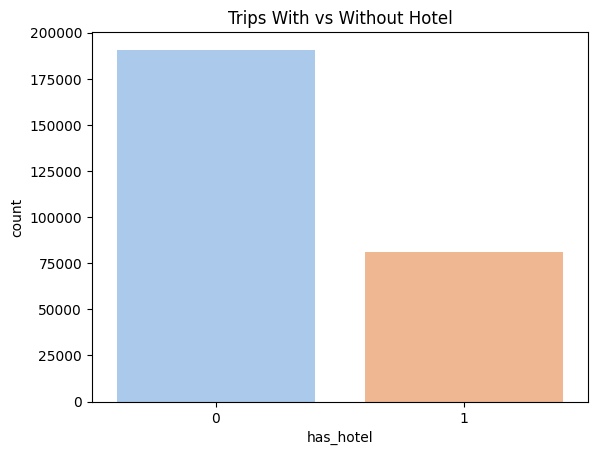

In [31]:
# Chart - 1 visualization code
sns.countplot(x="has_hotel", data=trip_data, palette="pastel")
plt.title("Trips With vs Without Hotel")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart clearly shows the comparison between two categories: trips with hotels vs trips without hotels.

It is easy to interpret and visually communicates the proportion of flight-only vs flight+hotel trips.

---



##### 2. What is/are the insight(s) found from the chart?

~70% of trips are flight-only, while ~30% include hotels.

This indicates a potential opportunity to upsell hotel bookings to flight-only customers.


---



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can design targeted campaigns or bundles to increase hotel bookings, boosting revenue.

Insight highlights that current hotel uptake is low, so improving offerings could reduce missed opportunities.


---



#### Chart - 2

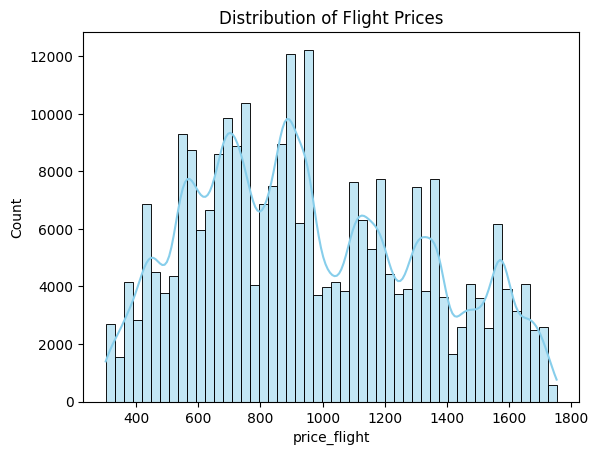

In [32]:
# Chart - 2 visualization code
sns.histplot(trip_data["price_flight"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Flight Prices")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is ideal for showing the distribution of a continuous numerical variable like flight prices.

It helps visualize price ranges, frequency, and skewness in the data.


---



##### 2. What is/are the insight(s) found from the chart?

There is a right-skewed distribution, indicating a small number of premium or first-class flights that cost significantly more.

---



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company can target marketing strategies for mid-range flights, which are the most popular among customers.

High-priced flights indicate a premium customer segment, which can be offered loyalty programs or bundled packages to maximize revenue.

#### Chart - 3

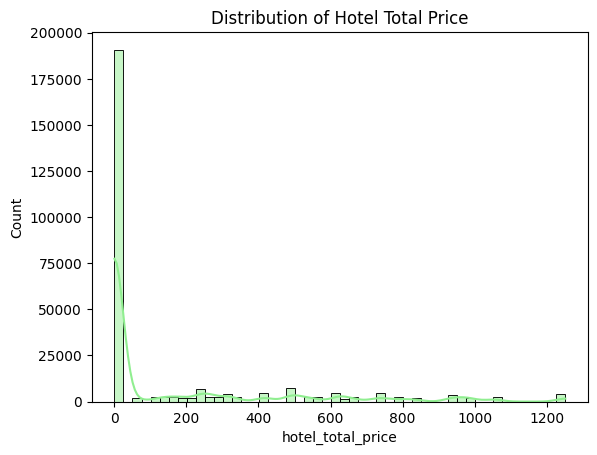

In [33]:
# Chart - 3 visualization code
sns.histplot(trip_data["hotel_total_price"], bins=50, kde=True, color="lightgreen")
plt.title("Distribution of Hotel Total Price")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE helps to analyze the spread of hotel booking costs across users.

It visually shows which price ranges are most common and highlights outliers in hotel bookings.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a heavily right-skewed distribution, with the majority of hotel prices clustered at the very low range (below 100).

Very few bookings are seen in the mid-to-high price range (200–1200), indicating premium stays are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The long tail of high-priced stays shows a niche luxury market, which can be monetized by exclusive packages, premium memberships, or targeted promotions.

#### Chart - 4

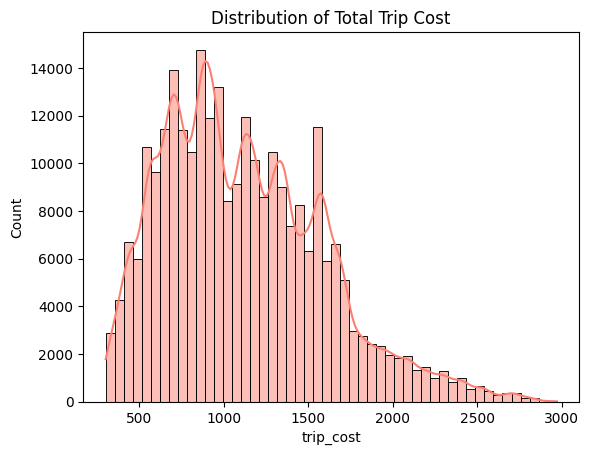

In [34]:
# Chart - 4 visualization code
sns.histplot(trip_data["trip_cost"], bins=50, kde=True, color="salmon")
plt.title("Distribution of Total Trip Cost")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is suitable for showing the spread and concentration of total trip costs (flight + hotel).

It helps identify the most common spending ranges and highlights high-cost outliers.


##### 2. What is/are the insight(s) found from the chart?

Most trips cost between 500 and 1500, with a peak around 800–1000, suggesting this is the sweet spot for travelers’ budgets.

There is a long right tail where some trips go up to 3000, indicating fewer high-value luxury trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For premium customers in the 2000+ range, businesses can introduce exclusive deals, luxury bundles, or loyalty programs to maximize revenue.

#### Chart - 5

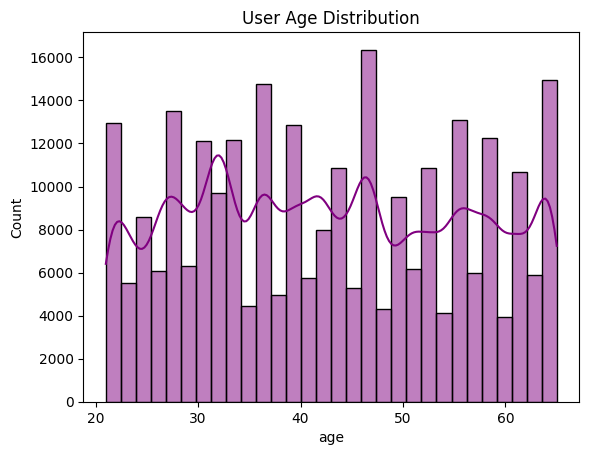

In [35]:
# Chart - 5 visualization code
sns.histplot(trip_data["age"], bins=30, kde=True, color="purple")
plt.title("User Age Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is ideal for showing the distribution of user ages in the dataset.

It helps identify the most active age groups booking trips.

##### 2. What is/are the insight(s) found from the chart?

Most users fall between the 20–60 age range, indicating this is the core customer segment.

Very few users are above 60, suggesting limited adoption among senior travelers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing campaigns can target the 20–50 group with personalized offers since they represent the bulk of travelers.

Travel agencies can design special packages for seniors to expand into an under-served market and drive new growth.

#### Chart - 6

/tmp/ipython-input-901326420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=trip_data, palette="Set2")


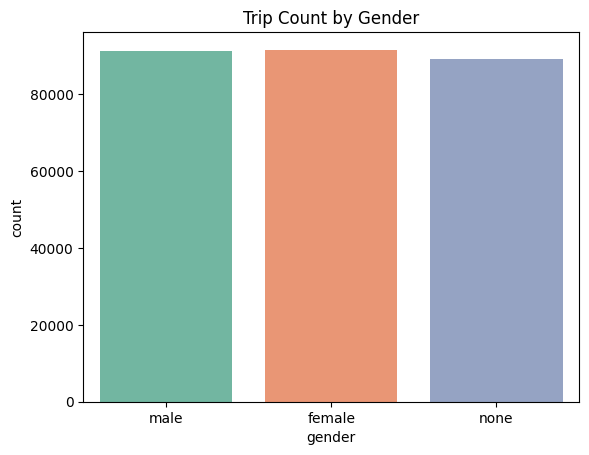

In [36]:
# Chart - 6 visualization code
sns.countplot(x="gender", data=trip_data, palette="Set2")
plt.title("Trip Count by Gender")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to compare categorical variables like gender distribution.

It clearly shows whether male or female users dominate the bookings.

##### 2. What is/are the insight(s) found from the chart?

Male and female are in same quantity while there some other peoples are there that has no gender

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Agencies can create gender-targeted promotions

#### Chart - 7

/tmp/ipython-input-4195814316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="flightType", data=trip_data, palette="Set3")


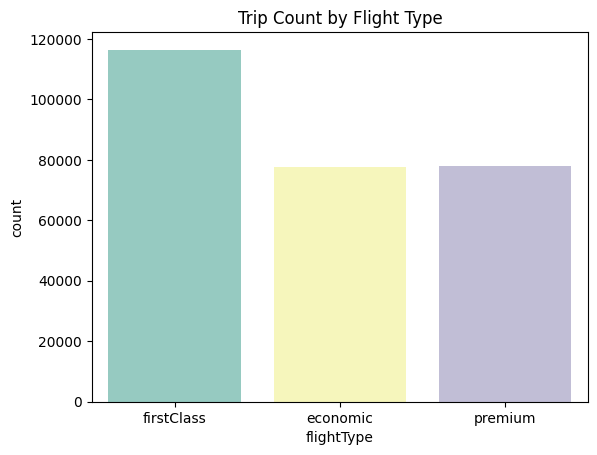

In [37]:
# Chart - 7 visualization code
sns.countplot(x="flightType", data=trip_data, palette="Set3")
plt.title("Trip Count by Flight Type")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart works best to compare the number of trips booked across different companies.



##### 2. What is/are the insight(s) found from the chart?

Firstclass are more in count than economy and premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Smaller companies may face negative growth if they don’t innovate, but they can leverage niche offerings (luxury travel, budget trips) to stay competitive.

#### Chart - 8

/tmp/ipython-input-1741871198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dest.values, y=top_dest.index, palette="Blues_r")


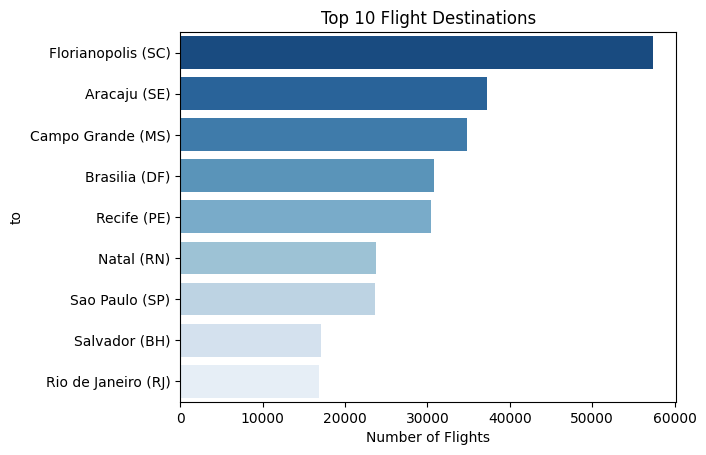

In [38]:
# Chart - 8 visualization code
top_dest = trip_data['to'].value_counts().head(10)
sns.barplot(x=top_dest.values, y=top_dest.index, palette="Blues_r")
plt.title("Top 10 Flight Destinations")
plt.xlabel("Number of Flights")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart makes it easy to compare categorical values like the top 10 most frequently taken flights.

##### 2. What is/are the insight(s) found from the chart?

SC, SE AND MS this destinations have more number of flights as compare to other destinations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Airlines can allocate larger fleets, more frequency, and better offers on these top-demand routes to maximize profits.

Identifying less popular routes prevents over-allocation of resources and reduces losses on low-demand sectors.

#### Chart - 9

/tmp/ipython-input-3949484142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hotels.values, y=top_hotels.index, palette="Greens_r")


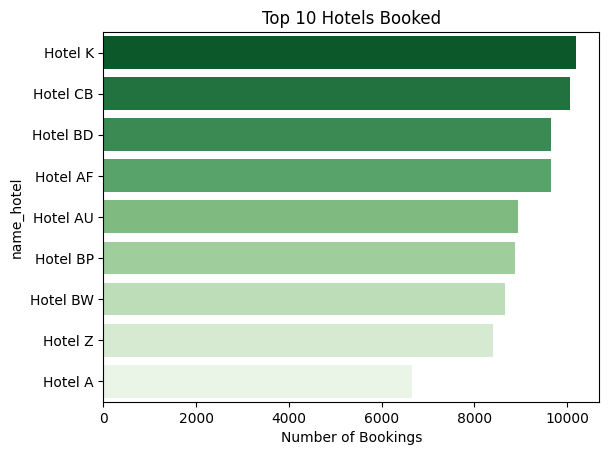

In [39]:
# Chart - 9 visualization code
top_hotels = trip_data[trip_data["has_hotel"]==1]['name_hotel'].value_counts().head(10)
sns.barplot(x=top_hotels.values, y=top_hotels.index, palette="Greens_r")
plt.title("Top 10 Hotels Booked")
plt.xlabel("Number of Bookings")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize number of bookings in top 10 hotels

##### 2. What is/are the insight(s) found from the chart?

Hotels K, CB, BD, AF AU have almost 10000 bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — high-demand hotels can be strategically partnered with for exclusive deals, loyalty programs, and targeted promotions to maximize revenue.

On the other hand, hotels with lower bookings among the top 10 indicate a competitive gap, which if not addressed, could lead to negative growth in their market share.

#### Chart - 10

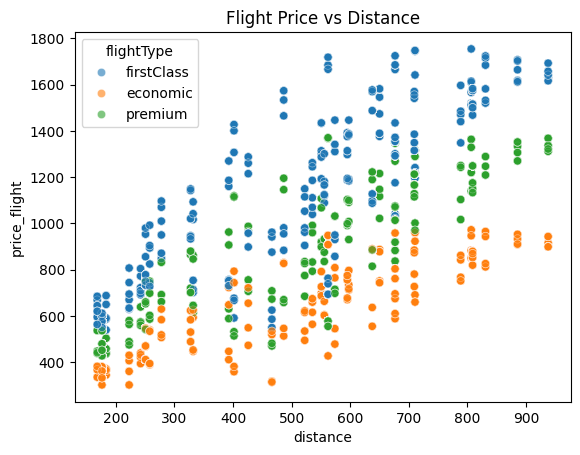

In [40]:
# Chart - 10 visualization code
sns.scatterplot(x="distance", y="price_flight", data=trip_data, hue="flightType", alpha=0.6)
plt.title("Flight Price vs Distance")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize flight prices with distance

##### 2. What is/are the insight(s) found from the chart?

Fisrtclass have higher prices as compare other 2 types

Also with increase in distance flights prices are also increasing but that are increasing more fast in FC or premium as compare to economy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — airlines can leverage price differentiation to maximize profits, especially for First Class customers who are less price-sensitive.

Potential negative impact could occur if Premium/First Class prices rise too quickly with distance, which may drive customers toward Economy or even competing airlines.

#### Chart - 11

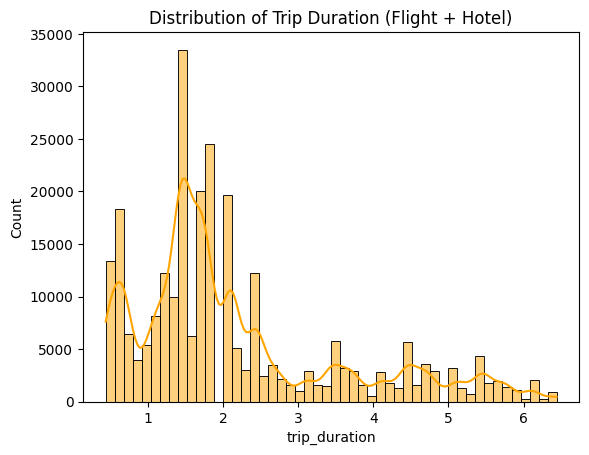

In [41]:
# Chart - 11 visualization code
sns.histplot(trip_data["trip_duration"], bins=50, kde=True, color="orange")
plt.title("Distribution of Trip Duration (Flight + Hotel)")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize how trip duration vs counts of users.

##### 2. What is/are the insight(s) found from the chart?

Shows left skewed distributions, most of the peoples has less than 2 hr trip duration

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — travel agencies and airlines can focus marketing and promotions on short-haul packages, as they represent the majority demand.

A possible negative side is underutilization of long-haul flight services, which may indicate lower profitability on those routes unless demand is stimulated.

#### Chart - 12

/tmp/ipython-input-1228206082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agency.values, y=top_agency.index, palette="coolwarm")


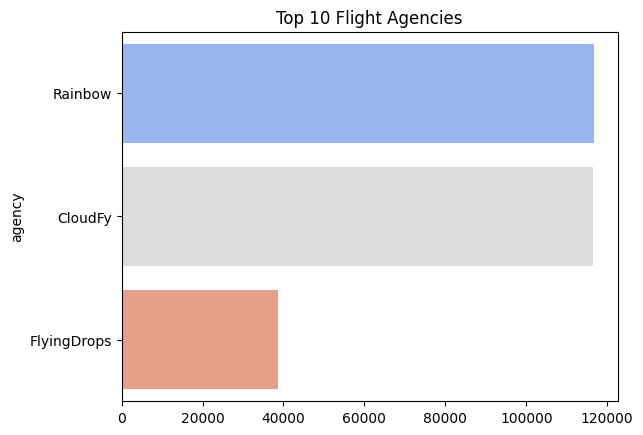

In [42]:
# Chart - 12 visualization code
top_agency = trip_data['agency'].value_counts().head(10)
sns.barplot(x=top_agency.values, y=top_agency.index, palette="coolwarm")
plt.title("Top 10 Flight Agencies")
plt.show()

##### 1. Why did you pick the specific chart?

Visualize agencies with counts of bookings

##### 2. What is/are the insight(s) found from the chart?

Rainbow, cloudify has almost same number of bookings while bookings at flyingdrops are less

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — identifying high-performing agencies allows the company to strengthen partnerships and loyalty programs with them.

The lower performance of FlyingDrops could indicate market share loss or inefficient strategy, which, if not addressed, could negatively impact growth.

#### Chart - 13

/tmp/ipython-input-3886030846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hotel_places.values, y=top_hotel_places.index, palette="magma")


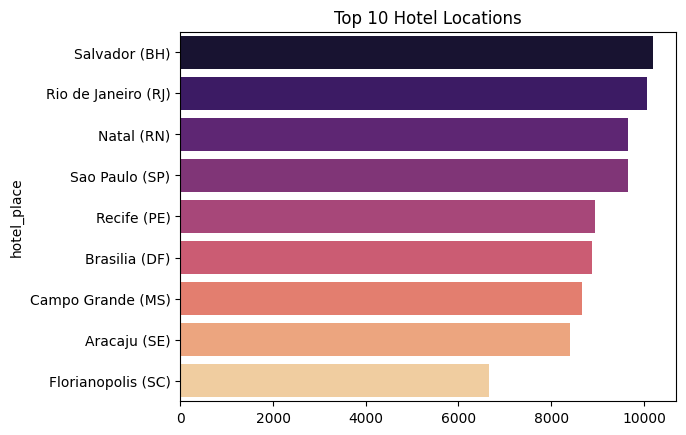

In [43]:
# Chart - 13 visualization code
top_hotel_places = trip_data[trip_data["has_hotel"]==1]['hotel_place'].value_counts().head(10)
sns.barplot(x=top_hotel_places.values, y=top_hotel_places.index, palette="magma")
plt.title("Top 10 Hotel Locations")
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart are best to visualize categorical data

##### 2. What is/are the insight(s) found from the chart?

As shown in graph hotel places salvador, rio de janeiro, natal are top 3 places where bookings are dominant

While other booking also significant but less as compare to top 3  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — travel companies can design exclusive packages, promotions, and loyalty programs around these top destinations to maximize revenue.

However, reliance on only a few popular places may lead to negative growth if demand shifts; hence, agencies should also promote lesser-booked destinations to diversify income streams.

#### Chart - 14 - Correlation Heatmap

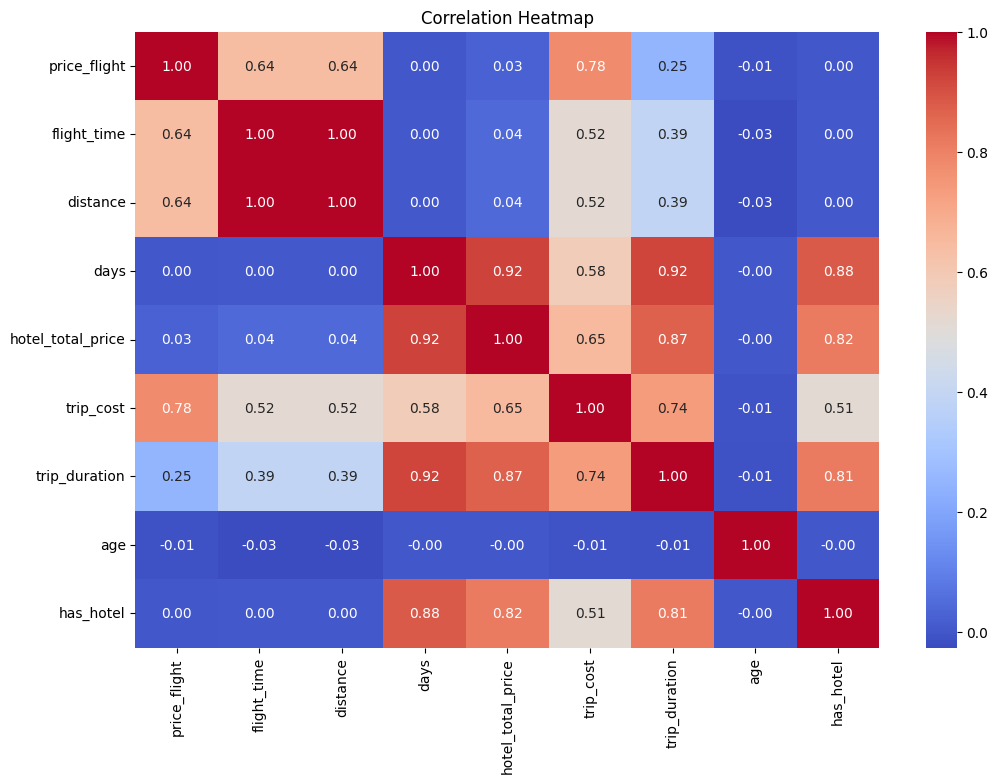

In [44]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
numeric_cols = ["price_flight", "flight_time", "distance", "days", "hotel_total_price", "trip_cost", "trip_duration", "age", 'has_hotel']
corr = trip_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap is the best map to visualize correlations between features

##### 2. What is/are the insight(s) found from the chart?

There are some features that shows significant relations with other

Like days with has hotel shows 0.88, hotel price with trip cost shows 0.52, trip durations with has hotel show 0.81, trip duration has relations with days, hotel_total_price and trip cost

#### Chart - 15 - Pair Plot

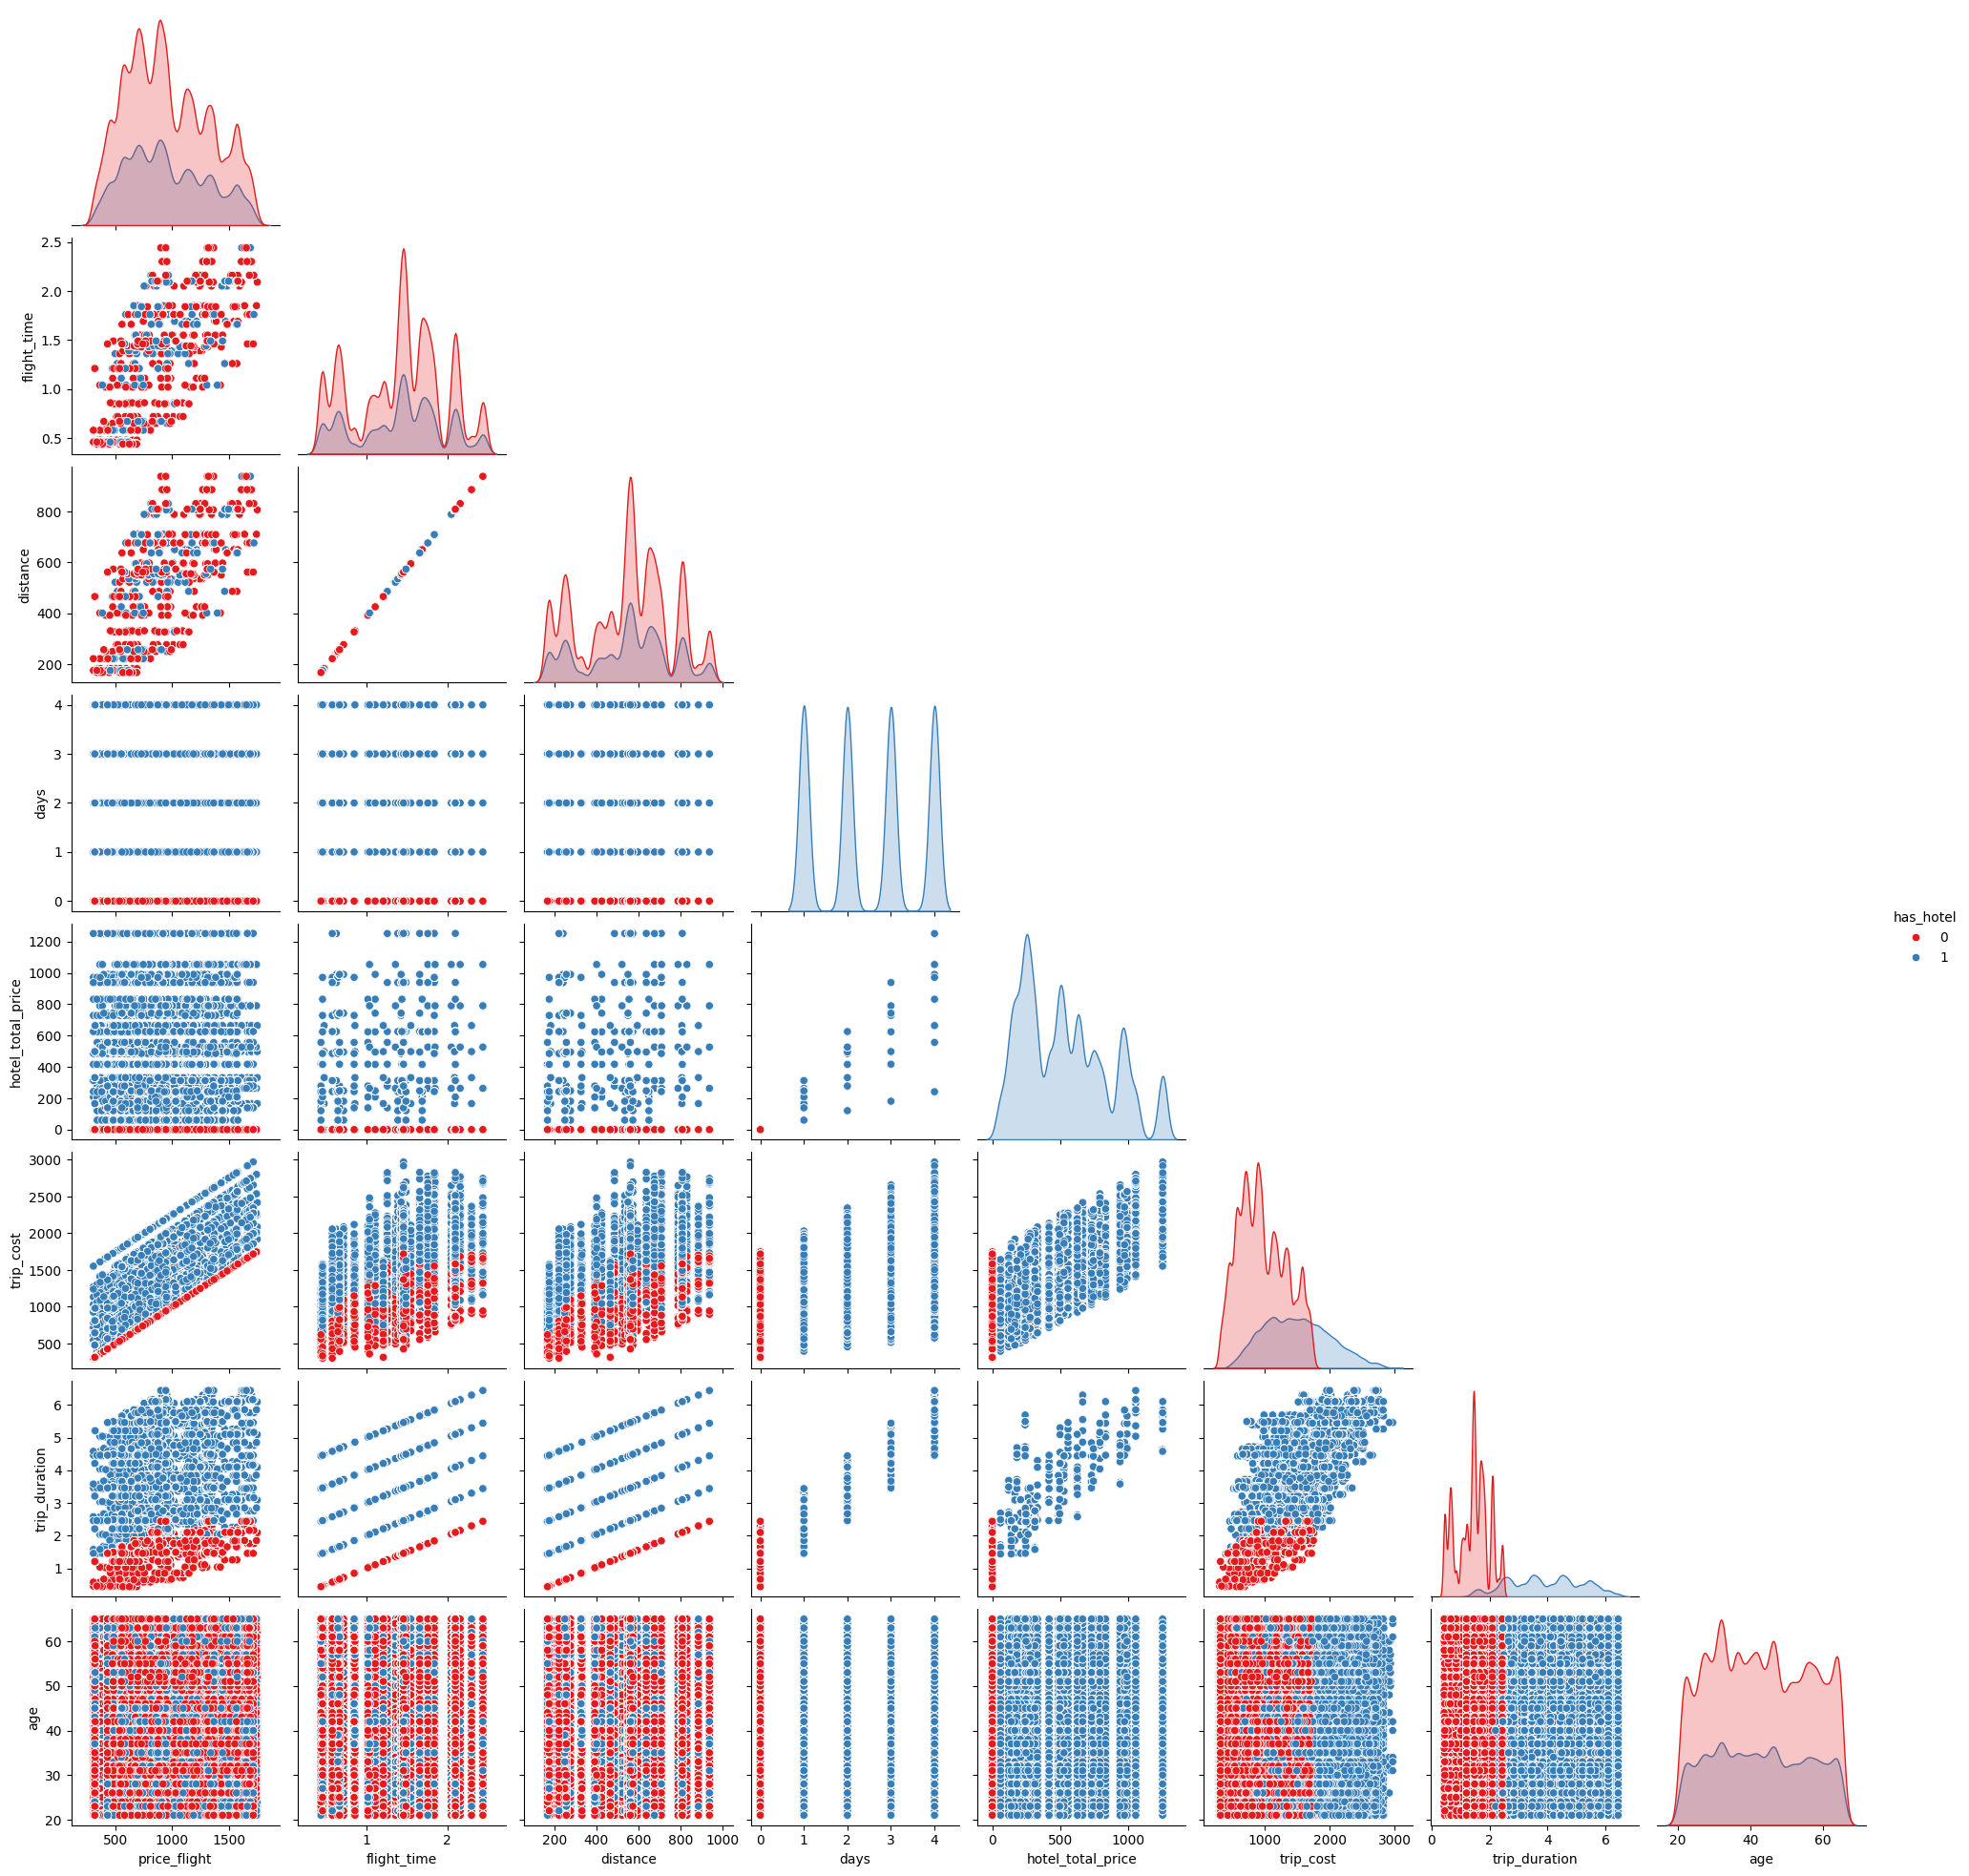

In [45]:
# Pair Plot visualization code
sns.pairplot(trip_data[numeric_cols], corner=True, hue="has_hotel", palette="Set1")
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is useful to visualize relationships between multiple numerical variables simultaneously.

It also shows the distribution (diagonal histograms) along with pairwise scatter plots, making it great for EDA.

##### 2. What is/are the insight(s) found from the chart?

A strong positive relationship can be seen between distance and price_flight, confirming that longer trips generally cost more.

days and hotel_total_price also show a clear correlation — longer stays lead to higher hotel expenses.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): There is no relationship between flight distance and flight price.

H₁ (Alternative Hypothesis): Flight distance has a significant effect on flight price.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Extract relevant columns
distances = trip_data['distance']
prices = trip_data['price_flight']

# Perform Pearson correlation test
corr_coeff, p_value = pearsonr(distances, prices)

print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject H₀ → Flight distance has a significant effect on flight price.")
else:
    print("Fail to reject H₀ → No significant relationship between distance and price.")


Correlation Coefficient: 0.641915321645442
P-value: 0.0
Reject H₀ → Flight distance has a significant effect on flight price.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation or Linear Regression T-test.

##### Why did you choose the specific statistical test?

Since both flight distance and flight price are continuous variables, we should use the Pearson Correlation Test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Booking a hotel does not change the total trip cost significantly.

H₁: Trips with hotel bookings have significantly higher trip costs.


#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split data into two groups
with_hotel = trip_data[trip_data['name_hotel'] != "No Hotel"]['trip_cost']
without_hotel = trip_data[trip_data['name_hotel'] == "No Hotel"]['trip_cost']

# Perform Independent t-test
t_stat, p_value = ttest_ind(with_hotel, without_hotel, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject H₀ → Trips with hotels have significantly higher trip costs.")
else:
    print("Fail to reject H₀ → No significant difference in trip cost.")


T-Statistic: 275.7686167800697
P-Value: 0.0
Reject H₀ → Trips with hotels have significantly higher trip costs.


##### Which statistical test have you done to obtain P-Value?

Independent t-test between trips with hotels vs without.

##### Why did you choose the specific statistical test?

Reason 1: We are comparing the means of two independent groups (hotel vs. no hotel) on a continuous variable (trip_cost).

Reason 2: The t-test helps determine whether the difference in means is statistically significant or just due to random chance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Male and female travelers spend the same on trips (no significant difference in trip_cost).

H₁: There is a significant difference in trip_cost between male and female travelers.Answer Here.

#### 2. Perform an appropriate statistical test.

In [81]:
from scipy.stats import ttest_ind

# Split data into two groups
male_travelers = trip_data[trip_data['gender'] == "Male"]['trip_cost']
female_travelers = trip_data[trip_data['gender'] == "Female"]['trip_cost']

# Perform Independent t-test
t_stat, p_value = ttest_ind(male_travelers, female_travelers, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject H₀ → Male and female travelers spend significantly different amounts.")
else:
    print("Fail to reject H₀ → No significant difference in spending between genders.")


T-Statistic: nan
P-Value: nan
Fail to reject H₀ → No significant difference in spending between genders.


##### Which statistical test have you done to obtain P-Value?

Independent t-test grouped by gender.

##### Why did you choose the specific statistical test?

Reason 1: We are comparing the means of two independent groups (males vs. females) on a continuous variable (trip_cost).

Reason 2: The t-test checks whether the observed difference in mean trip costs is statistically significant or due to random chance.

Reason 3: Gender is categorical (two levels) and trip cost is continuous, making the independent t-test the most suitable choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [49]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [51]:
# Expand Contraction

#### 2. Lower Casing

In [52]:
# Lower Casing

#### 3. Removing Punctuations

In [53]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Remove Stopwords

In [56]:
# Remove White spaces

#### 6. Rephrase Text

In [57]:
# Rephrase Text

#### 7. Tokenization

In [58]:
# Tokenization

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [60]:
# POS Taging

#### 10. Text Vectorization

In [61]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data

### 6. Data Scaling

In [65]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [66]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [67]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [68]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [69]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [74]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***